# Molecular Speeds lab Python data analysis - multiple gas dataset processing

This Python workshop was originally developed by VUW Physics students William Holmes-Hewett and Campbell Matthews.  Thanks to both of them for their energy and enthusiam in making this resource.

Start a new code file in the folder that you have saved all of the .csv files.  You can take a look at the example code you have been given or just start from scratch and workthrough from here.  

## Importing modules

Let's begin by importing all the modules we will need at the top of the code and adding in the variables that we know we will need for the analysis.  

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from math import log
import math

## Setting up variables and constants required later

In [23]:
V=2.03*10**-3
A=5.55113*10**-8
ef_begin=0.26

What we are going to do here is run a for loop over all the code we wrote for all files in a specific folder. This will be the folder we are in, so make sure that's where you are and you have all the data from the workshop folder.   

## New moldues for file organisation

To start with we need to import the other modules we are going to use.

os (or Miscellaneous Operating system interfaces) let's us look up file paths and folder locations.

Glob lets us find all files matching a pattern.

These are file organisation tools.  You can look up more about them if you like.

In [24]:
import os
import glob

The first thing we want to do is set the location of our folder which is where the script is stored i.e. CWD or current working directory.

This is one of the reasons why we made our .py code in the same folder as the data.  You could use a different folder but that would be trickier.  Although certinaly doable.

In [30]:
folder=os.getcwd()

## File formats

Now we know where the files are stored we need to set the pattern (or type of files) for Glob to look for.

In [26]:
fileformat=folder+str('/*.csv')

This will make the script only look for csv files in the correct folder.

We now want to create an array of the filenames, these are named after the gases and mass numbers.

In [31]:
files=glob.glob(fileformat)

## Building the arrays

Create an array of masses from filenames to use later, as filenames are  strings we need to set them as intergers.  Note that -ve indicies run from the end.

In [32]:
masses=[int(f[-6:-4]) for f in files]

ValueError: invalid literal for int() with base 10: '_2'

It might not be totally clear what this is doing unless we print the output. 

In [29]:
print(files)

['C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics\\notebooks\\phys221\\Argon 38.csv', 'C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics\\notebooks\\phys221\\Carbon Dioxide 40.csv', 'C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics\\notebooks\\phys221\\Chlorine 71.csv', 'C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics\\notebooks\\phys221\\Fluorine 38.csv', 'C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics\\notebooks\\phys221\\Krypton 84.csv', 'C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics\\notebooks\\phys221\\Methane 16.csv', 'C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics\\notebooks\\phys221\\Neon 17.csv', 'C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics\\notebooks\\phys221\\Nitrogen 28.csv', 'C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics\\notebooks\\phys221\\Nitrogen 28_2.csv', 'C:\\Users\\plankna\\Dropbox\\GithubStuff_tosave\\python-physics

argh!!!  depending on your filing system this might look horrible...

I think it becomes clearer if we print the output of the array.

In [17]:
print(masses)

NameError: name 'masses' is not defined

Hopefully this helps to see what has gone on.  We have taken the string from the file name and turned them into an integer.  To do this we counted back from the end of the file name.

We now need to find out how many files we have in the folder.  We know how to do that already.

In [18]:
n=len(files)

We also need to create an empty array to populate later.

In [19]:
v=np.zeros(n)

## Applying the previous code to multiple files

We now want to simply run though the previous code (in the single gas experiment) for all of the files in the folder.

In [20]:
for j in range(n):

    #we need to indent all this code and change the argument in genfromtext 
    #to files[j] 
    
    rawdata=np.genfromtxt(files[j], delimiter=',')
    time=rawdata[:,0]
    pressure=rawdata[:,1]
    baseP=min(rawdata[:,1])
    P_minus_baseP=[i-0.99*baseP for i in pressure]
    res=[abs(i-ef_begin) for i in P_minus_baseP]
    minres=min(res)
    for i in range (len(res)):
        if res[i]==minres:
            Peff_index=i
            break
    LogP=[log(i) for i in P_minus_baseP]
    fit=np.polyfit(time[Peff_index:1400],LogP[Peff_index:1400],1)
    m=fit[0]
    c=fit[1]
    

IndexError: too many indices for array

note, we no longer have cats... ;-)

compare this to your previous code.  It is the same, just compressed.

Now I am adding on to this and plotting the data.

In [21]:
for j in range(n):

    #we need to indent all this code and change the argument in genfromtext 
    #to files[j] 
    
    rawdata=np.genfromtxt(files[j], delimiter=',')
    time=rawdata[:,0]
    pressure=rawdata[:,1]
    baseP=min(rawdata[:,1])
    P_minus_baseP=[i-0.99*baseP for i in pressure]
    res=[abs(i-ef_begin) for i in P_minus_baseP]
    minres=min(res)
    for i in range (len(res)):
        if res[i]==minres:
            Peff_index=i
            break
    LogP=[log(i) for i in P_minus_baseP]
    fit=np.polyfit(time[Peff_index:1400],LogP[Peff_index:1400],1)
    m=fit[0]
    c=fit[1]
    
    
    #now we put each of these in one of the spots in the vector v
    
    v[j]=-4*V*m/A


#now lets print v

######################print(v)

#we can then plot v as a function of mass number

plt.scatter(masses,v)   

#we can now create a theoritical line to match these to

#first we need a range of mass numbers
    

IndexError: too many indices for array

## Analysis

Text(0, 0.5, 'Velocity')

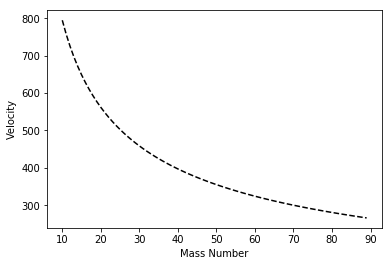

In [16]:
#now we simply complete the theoritical calculation

vtheory=[math.sqrt(8/math.pi*1.38*(10**-23)*300/i/(1.67*10**-27)) for i in range(10,90)]

#and plot the result on our plot

plt.plot(range(10,90),vtheory,'k--')

#we can add some labels

plt.xlabel('Mass Number')
plt.ylabel('Velocity')

Putting these last two parts together we find (this will be what comes up in Spyder).

Text(0, 0.5, 'Velocity')

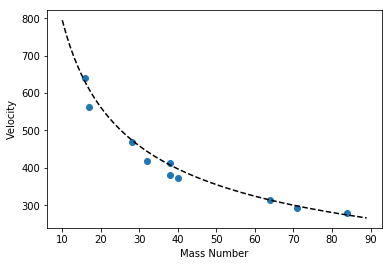

In [17]:
for j in range(n):

    #we need to indent all this code and change the argument in genfromtext 
    #to files[j] 
    
    rawdata=np.genfromtxt(files[j], delimiter=',')
    time=rawdata[:,0]
    pressure=rawdata[:,1]
    baseP=min(rawdata[:,1])
    P_minus_baseP=[i-0.99*baseP for i in pressure]
    res=[abs(i-ef_begin) for i in P_minus_baseP]
    minres=min(res)
    for i in range (len(res)):
        if res[i]==minres:
            Peff_index=i
            break
    LogP=[log(i) for i in P_minus_baseP]
    fit=np.polyfit(time[Peff_index:1400],LogP[Peff_index:1400],1)
    m=fit[0]
    c=fit[1]
    
    
    #now we put each of these in one of the spots in the vector v
    
    v[j]=-4*V*m/A


#now lets print v

######################print(v)

#we can then plot v as a function of mass number

plt.scatter(masses,v)

#we can now create a theoritical line to match these to

#first we need a range of mass numbers



#now we simply complete the theoritical calculation

vtheory=[math.sqrt(8/math.pi*1.38*(10**-23)*300/i/(1.67*10**-27)) for i in range(10,90)]

#and plot the result on our plot

plt.plot(range(10,90),vtheory,'k--')

#we can add some labels

plt.xlabel('Mass Number')
plt.ylabel('Velocity')

Compare this to your results from the PHYS223 lab.  

What are the advantages of using the Python script?

_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys221/Multiplots.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys221/Multiplots.py)._